In [1]:
library(ggplot2)

options(repr.plot.width=4, repr.plot.height=4)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# Der zentrale Grenzwertsatz

Seine $X_1, \cdots, X_n$ eine Folge von unabhängigen und identisch verteilten Zufallsvariablen, so dass
Mittelwert $\mu$ und Standardabweichung $\sigma$ definiert und endlich sind. Sei
\begin{align}
    S_n &= X_1 + \cdots + X_n\\
    Z_n &= \frac{S_n -n\mu}{\sigma\sqrt{n}}
\end{align}

Dann gilt:
\begin{align}
    \Phi(z) &\doteq \int_{-\infty}^z \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}dx\\
    \lim_{n\rightarrow \infty} P(Z_n \leq z) &= \Phi(z)
\end{align}

Vulgo: Die Summe von i.i.d. Zufallsvariablen kann durch eine Normalverteilung approximiert werden.

## Illustration des zentralen Grenzwertsatzes

Für eine Standard-Gleichverteilung in $[0, 1]$ gilt:
- $\mu = \frac{1}{2}$
- $\sigma = \frac{\sqrt{3}}{6}$

Wenn $x$ standard-gleichverteilt ist, hat $\sqrt{3}~(2x-1)$ Mittelwert 0 und Standardabweichung 1.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] -0.006523052

[1] 0.9778393

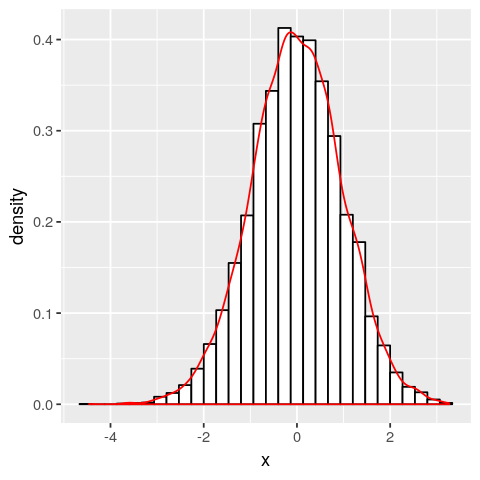

In [2]:
x <- replicate(10000, sum(replicate(1000, 
                                    sqrt(3)*(2*runif(1)-1)))/sqrt(1000))

ggplot(data.frame(x), aes(x=x)) + 
    geom_histogram(aes(y = ..density..), color='black', fill='white') + 
    geom_density(col='red')

(mean(x))
(sd(x))

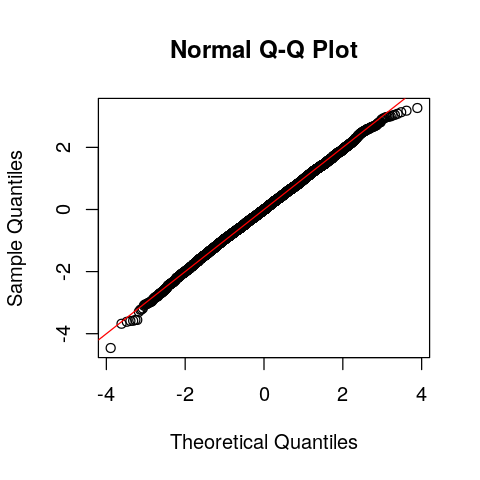

In [3]:
qqnorm(x)
abline(0, 1, col='red')


In [4]:
ks.test(x, "pnorm")


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.012844, p-value = 0.0738
alternative hypothesis: two-sided


In [5]:
shapiro.test(x[1:5000])


	Shapiro-Wilk normality test

data:  x[1:5000]
W = 0.99961, p-value = 0.4357


In [6]:
ks.test(runif(100), "pnorm")


	One-sample Kolmogorov-Smirnov test

data:  runif(100)
D = 0.50088, p-value < 2.2e-16
alternative hypothesis: two-sided


## Simulation der Normalverteilung durch die Verwerfungsmethode

Für die Funktion $g$ wähle ich
$$g(x) = \frac{e^x}{(1+e^x)^2}$$

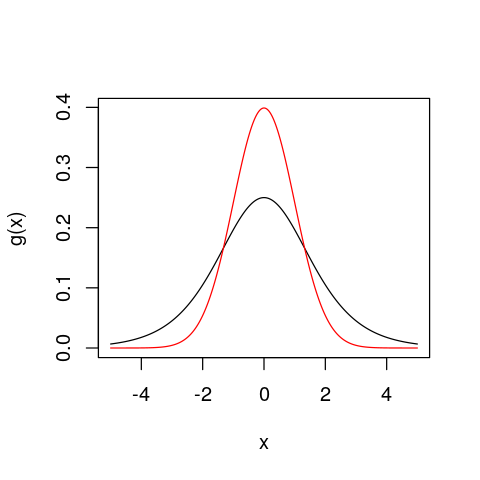

In [7]:
xx <- seq(-5, 5, length.out=1000)
g <- function(x) exp(x)/(1+exp(x))^2
plot(xx, g(xx), type='l', xlab='x', ylab='g(x)',
    ylim=c(0, dnorm(0)))
points(xx, dnorm(xx), type='l', col='red')

Die Verteilungsfunktion $G(x) = \int_{-\infty}^y g(x)$ ist die _logistische Funktion_ 

$$G(x) = \frac{1}{1+e^{-x}}$$

Deren Umkehrung $G^{-1}$ ist die _Logit-Funktion_ 

$$G^{-1}(p) = \log\frac{p}{1-p}$$

Daher lässt sich durch die inverse Methode leicht eine $g$-verteilte Zufallsvariable generieren.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] -0.002754848

[1] 1.809226

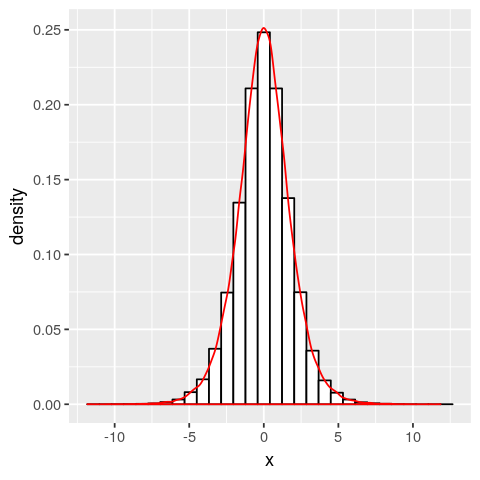

In [8]:
logit <- function(p) log(p/(1-p))
x <- replicate(100000, logit(runif(1)))

ggplot(data.frame(x), aes(x=x)) + 
    geom_histogram(aes(y = ..density..), color='black', fill='white') + 
    geom_density(col='red')

(mean(x))
(sd(x))

$$\begin{align} 
c &= \max \frac{f(x)}{g(x)}\\
\arg\max_x ~\frac{f(x)}{g(x)} &= 0\\
c &= \frac{f(0)}{g(0)}\\
&= \frac{4}{\sqrt{2\pi}}
\end{align}$$

In [9]:
C = 4/sqrt(2*pi)

f <- function(x) {
    return(1/sqrt(2*pi) * exp(-x^2/2))
}

rnormal <- function() {
    x <- logit(runif(1))
    u <- runif(1)
    weiter = TRUE
    while (weiter) {
        if (u > f(x)/(C*g(x))) {
            x <- logit(runif(1))
            u <- runif(1)
        } else {
            weiter = FALSE
        }
    }
    return(x)
}


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 0.00163599

[1] 0.9965657

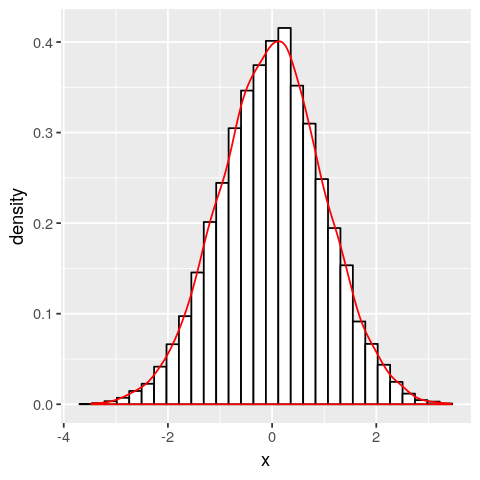

In [10]:
x <- replicate(10000, rnormal())
ggplot(data.frame(x), aes(x=x)) + 
    geom_histogram(aes(y = ..density..), color='black', fill='white') + 
    geom_density(col='red')

(mean(x))
(sd(x))

In [11]:
qqnorm(x)
abline(0, 1, col='red')

In [12]:
ks.test(x, "pnorm")


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.0072798, p-value = 0.6643
alternative hypothesis: two-sided


In [13]:
shapiro.test(x[1:500])


	Shapiro-Wilk normality test

data:  x[1:500]
W = 0.9979, p-value = 0.797


# Simulation der Normalverteilung durch die Polar-Methode
## Box-Muller-Verfahren

Seien $X$ und $Y$ zwei unabhängige standard-normalverteilte Zufallsvariablen. $R$ und $\Theta$ sind die entsprechenden polaren Koordinaten, also

$$
\begin{align}
R² = d &= X^2 + Y^2\\
\Theta &= \arctan \frac{Y}{X}
\end{align}
$$

Sei $d = R^2 = X^2 + Y^2$.

Die gemeinsame Dichte von $X$ und $Y$ ist
$$\begin{align}
f(x, y) &= \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}\frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}\\
&= \frac{1}{2\pi} e^{-(x^2+y^2)/2}
\end{align}$$

### Allgemeine Regel zum Wechsel von Variablen in Dichtefunktionen

Sei $H$ eine differenzierbare bijektive Funktion zwischen Vektorräumen. Dann gilt
$$
g(H(\vec x)) = f(\vec x) \left| \det(\frac{\nabla H^{-1}(\vec y)}{\nabla \vec y}|_{\vec{y}=H(\vec{x})}) \right|
$$

Angewandt auf $f$ ergibt das

$$\begin{align}
g(d, \Theta) &= \frac{1}{2} \frac{1}{2\pi} e^{-d/2}\\
&= \frac{1}{2\pi} \cdot \frac{1}{2} e^{-d/2}
\end{align}$$

Das ist das Produkt einer Gleichverteilung über $\Theta$ im Intervall $[0, 2\pi]$ und einer Exponentialverteilung über $d$ mit Mittelwert 2.

Wenn man also eine exponential verteilte Zufallsvariable $d$ mit Mittelwert 2 und eine im Interval $[0, 2\pi]$ gleichverteilte Zufallsvariable $\theta$, generiert, sind die folgenden Variablen unabhängig und standard-normalverteilt:

$$\begin{align}
x &= \sqrt{d}\cos \theta\\
y &= \sqrt{d}\sin \theta
\end{align}$$

Dieses Verfahren heißt **Box-Muller-Methode**.

Die kostspielige Berechnung der trigonometrischen Funktionen lässt sich vermeiden, indem man state $\Theta$ gleichverteilte Koordinaten $(x, y)$ innerhalb des Einheitskreises simuliert.


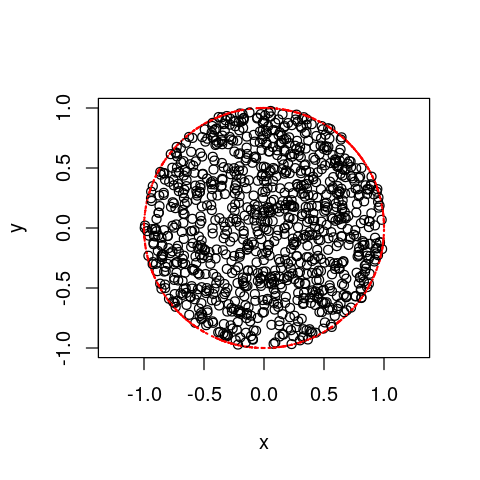

In [31]:
plot(NULL, xlim=c(-1, 1), ylim=c(-1,1), asp=1,
    xlab='x', ylab='y')
for (i in 1:1000) {
    weiter <- TRUE
    while (weiter) {
        x <- 2*runif(1)-1
        y <- 2*runif(1)-1
        if ((x^2 + y^2) <= 1) {
            weiter <- FALSE
        }
    }
    points(x, y)
    points(x/sqrt(x^2+y^2), y/sqrt(x^2+y^2), col='red', cex=.1)
}


Aus den Regeln für das Wechseln von Variablen folgt, dass bei diesem Verfahren $R^2 = x^2 + y^2$ und $\theta = \arctan \frac{y}{x}$ unabhängige, gleichverteilte Zufallsvariablen sind (über die Intervalle $[0, 1]$ und $[0, 2\pi]$. Daher kann man $R^2 = x^2 + y^2$ zur Simulierung der exponentiell verteilten Variable recyclen.

In [15]:
polarNormal <- function() {
    weiter <- TRUE
    while (weiter) {
        x <- 2*runif(1)-1
        y <- 2*runif(1)-1
        if ((x^2 + y^2) <= 1) {
            weiter <- FALSE
        }
    }
    R2 <- x^2+y^2
    output <- sqrt(-2*log(R2))*c(x, y)/sqrt(R2)
    return(output)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] -0.003984917

[1] 1.008351

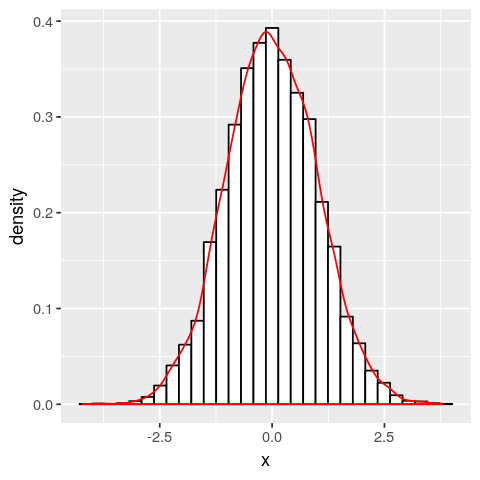

In [16]:
x <- as.vector(replicate(5000, polarNormal()))
ggplot(data.frame(x), aes(x=x)) + 
    geom_histogram(aes(y = ..density..), color='black', fill='white') + 
    geom_density(col='red')

(mean(x))
(sd(x))

In [17]:
qqnorm(x)
abline(0, 1, col='red')

In [18]:
ks.test(x, "pnorm")


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.0093961, p-value = 0.3404
alternative hypothesis: two-sided


In [19]:
shapiro.test(x[1:500])


	Shapiro-Wilk normality test

data:  x[1:500]
W = 0.99577, p-value = 0.1987


## Normalverteilung: Allgemeiner Fall

Eine normal verteilte Zufallsvariable hat die Dichtefunktion
$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

Dabei sind $\mu$ der Mittelwert und $\sigma$ die Standardabweichung.

Wenn $X$ normalverteilt ist mit Parametern $\mu, \sigma$, dann ist $\frac{x-\mu}{\sigma}$ standard-normalverteilt.

Mit Hilfe dieses Zusammenhangs lassen sich standard-normalverteilte Zufallszahlen in beliebig parametrisierte normalverteilte Zufallszahlen transformieren.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] -10.00035

[1] 0.1001536

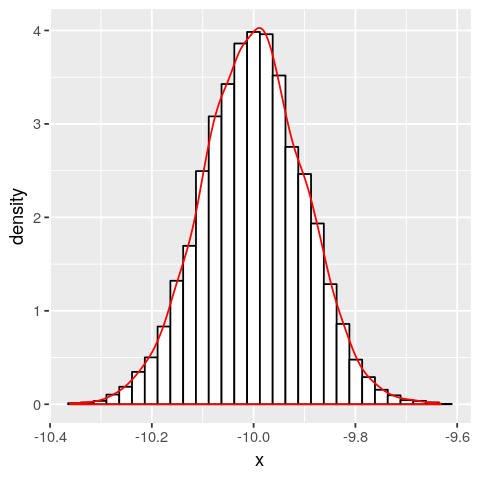

In [20]:
mu <- -10
sigma <- 0.1

z <- as.vector(replicate(5000, polarNormal()))
x <- sigma*z + mu

ggplot(data.frame(x), aes(x=x)) + 
    geom_histogram(aes(y = ..density..), color='black', fill='white') + 
    geom_density(col='red')

(mean(x))
(sd(x))

## Multivariate Verteilungen

### Standard-Normalverteilung

Wahrscheinlichkeitsverteilung über relle Vektoren, mit der Dichte-Funktion:
$$
f(\vec x) = (2\pi)^{-\frac{k}{2}} e^{-\frac{\vec{x}^T\vec{x}}{2}}
$$

(Das ist einfach das Produkt der Dichten von $k$ univariaten Standard-Normalverteilungen.)

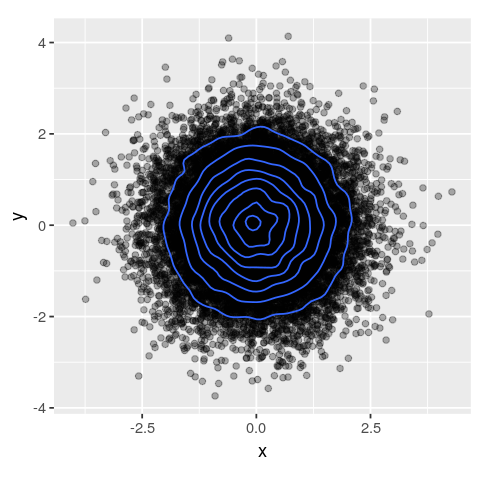

In [21]:
d <- data.frame(matrix(replicate(20000, polarNormal()), ncol=2))
colnames(d) <- c('x', 'y')

ggplot(d, aes(x=x, y=y)) + geom_point(alpha=.3) + geom_density_2d() + coord_fixed()

Sei 
$$\begin{align}
A &= \begin{pmatrix}
4 & 8\\
2 & 3
\end{pmatrix}\\
\mu &= (1, 2)^T
\end{align},
$$

und sei $Z = (Z_1, Z_2)$ eine standard-normalverteilte bivariate Zufallsvariable. Dann ist
$$
X = (AZ^T + \mu)^T
$$
eine bivariate Zufallsvariable mit der Dichte
$$
f(X) = \frac{1}{2\pi\sqrt{\det(\Sigma)}} e^{-\frac{1}{2}(X^T-\mu)^T\Sigma^{-1} (X^T-\mu)},
$$
wobei
$$
\Sigma = A A^T
$$

Im Beispiel:
$$\begin{align}
\Sigma &= \begin{pmatrix}
80 & 32\\
32 & 13
\end{pmatrix}\\
\det(\Sigma) &= 16\\
\Sigma^{-1} &= \frac{1}{16}\begin{pmatrix}
13 & -32\\
-32 & 80
\end{pmatrix}
\end{align}$$

$\Sigma$ heißt die **Varianz-Kovarianz-Matrix** der Verteilung. Es ist das multivariate Analog der univariaten Varianz $\sigma^2$. Das Verhalten einer multivariaten Normalverteilung ist durch $\mu$ und $\Sigma$ eindeutig bestimmt. Weiterhin ist für gegeben Varianz-Kovarianz-Matrix die multivariate Normalverteilung die Wahrscheinlichkeitsverteilung mit maximaler Entropie.

In [22]:
(A <- matrix(c(4, 8, 2, 3), nrow=2, byrow=T))
mu <- c(1, 2)
(Sigma <- A %*% t(A))
(detSigma <- det(Sigma))
(invSigma <- solve(Sigma))

[,1] [,2]
[1,] 4    8   
[2,] 2    3

[,1] [,2]
[1,] 80   32  
[2,] 32   13

[1] 16

[,1]    [,2]
[1,]  0.8125 -2  
[2,] -2.0000  5

Multivariat standard-normalverteilte Zufallszahlen können durch Multiplikation mit $A$ und Addition von $\mu$ leicht in beliebige Normalverteilungen transformiert werden.

x1        x2 
0.9468985 1.9764105

x1       x2      
x1 79.30058 31.83035
x2 31.83035 12.97755

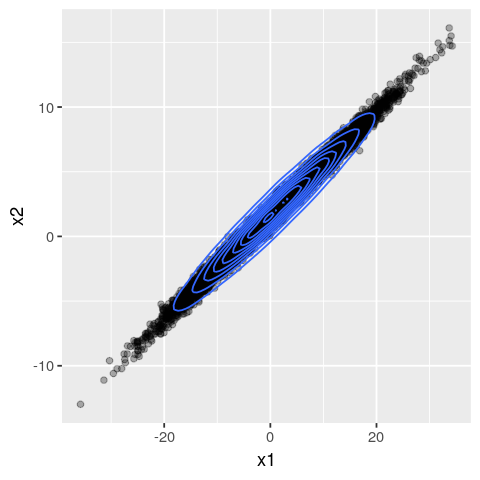

In [23]:
z <- replicate(10000, polarNormal())
x <- data.frame(t((A %*% z) + mu ))
colnames(x) <- c('x1', 'x2')

apply(x, 2, mean)
var(x)
ggplot(x, aes(x=x1, y=x2)) + geom_point(alpha=.3) + geom_density_2d()

### Dekorrelation einer Varianz-Kovarianz-Matrix durch Cholesky-Zerlegung

Angenommen, wir kennen für eine multivariate Normalverteilung die Parameter $\mu$ und $\Sigma$. 
Wir möchten Zufallszahlen für diese Verteilung generieren.

Wenn wir eine Matrix $A$ kennen mit der Eigenschaft $\Sigma = A A^T$, können wir obige Methode verwenden,
um aus standard-multivariat-normalverteilten Zufallszahlen die gewünschten Zufallszahlen zu gewinnen.

Wenn $\Sigma$ positiv (semi-)definit ist, ist es immer möglich, eine solche Matrix $A$ zu berechnen, 
dank des Theorems: 

*Wenn $\Sigma$ eine symmetrische, positiv (semi-)definite Matrix ist, dann gibt es genau eine
**untere Dreiecksmatrix** $A$, so dass $\Sigma = A A^T$.*

Diese Zerlegung heißt **Cholesky-Zerlegung**. 

Für unser Beispiel gilt:
$$
B = \frac{1}{\sqrt{5}}\begin{pmatrix}
20 & 0 \\
8 & 1
\end{pmatrix}
$$

In [24]:
t(chol(Sigma))

[,1]     [,2]     
[1,] 8.944272 0.0000000
[2,] 3.577709 0.4472136

In [25]:
(B = matrix(c(20, 0, 8, 1), nrow=2, byrow=T)/sqrt(5))

[,1]     [,2]     
[1,] 8.944272 0.0000000
[2,] 3.577709 0.4472136

In [26]:
B %*% t(B)

[,1] [,2]
[1,] 80   32  
[2,] 32   13

x1       x2 
0.850662 1.945115

x1       x2      
x1 80.05579 32.02300
x2 32.02300 13.00808

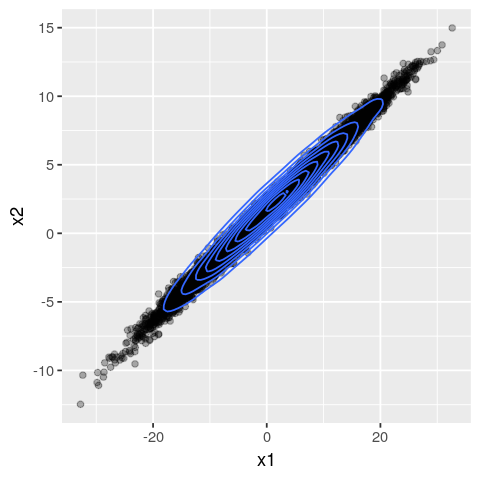

In [27]:
z <- replicate(10000, polarNormal())
x <- data.frame(t((B %*% z) + mu ))
colnames(x) <- c('x1', 'x2')

apply(x, 2, mean)
var(x)
ggplot(x, aes(x=x1, y=x2)) + geom_point(alpha=.3) + geom_density_2d()

### Höherdimensionales Beispiel

In [28]:
Sigma <- matrix(c(4, 12, -16,
                 12, 37, -43,
                 -16, -43, 98), nrow=3)
mu <- c(1, 2, 3)

(A <- t(chol(Sigma)))
(A %*% t(A))

[,1] [,2] [,3]
[1,]  2   0    0   
[2,]  6   1    0   
[3,] -8   5    3

[,1] [,2] [,3]
[1,]   4   12  -16 
[2,]  12   37  -43 
[3,] -16  -43   98

In [29]:
z <- matrix(replicate(3*1e5, polarNormal()), ncol=3)
x <- t(A %*% t(z) + mu)

In [30]:
apply(x, 2, mean)
cov(x)

[1] 1.005158 2.014051 2.974695

[,1]      [,2]      [,3]     
[1,]   4.00438  12.01195 -16.02184
[2,]  12.01195  37.03676 -43.02848
[3,] -16.02184 -43.02848  98.30710